**This command you installs the Kaggle Python library, which is a toolkit for working with data from the Kaggle platform in Python.**

In [4]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.4 MB/s 
     |████████████████████████████████| 155 kB 16.2 MB/s 
     |████████████████████████████████| 247 kB 64.3 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 55.3 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 61 kB 106 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=215f69f4234fe8ad0979273b7409ac3d355d69c59aee9e73f477d6f9bd031537
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

The **files.upload** function is a method of the google.colab library that allows you to upload files from your local machine to a Colab notebook or runtime.

The files.upload function is convenient for quickly uploading and accessing small files in Colab, but it may not be suitable for larger files or for uploading multiple files at once. In those cases, you may need to use the google.colab.drive module to access Google Drive.

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usmanbakht","key":"c7f5cfaf61215c50c285cbeb221a148b"}'}

The ~/.kaggle directory is used to store the Kaggle API configuration file, called kaggle.json.

In [5]:
!mkdir ~/.kaggle #created at root folder in colab


mkdir: cannot create directory ‘/root/.kaggle’: File exists


This command copies the kaggle.json file to the ~/.kaggle directory in the home directory of the current user.

In [6]:
#copy
!cp kaggle.json ~/.kaggle

This command changes the permissions of the kaggle.json file in the ~/.kaggle directory, setting the read and write permissions for the owner and denying access to everyone else. 

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          11651        345  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           2334         63  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           7238        155  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

It downloads a dataset from Kaggle using the kaggle command-line tool.

In [9]:
!kaggle datasets download -d puneet6060/intel-image-classification

 92% 320M/346M [00:02<00:00, 144MB/s]
100% 346M/346M [00:02<00:00, 125MB/s]


The unzip command is a utility for extracting files from a zip archive, and it is commonly used to extract files from zip files that have been downloaded from the internet.

In [10]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet 

It mounts your Google Drive account to a Colab notebook or runtime, allowing you to access the files and directories in your Google Drive from within the Colab environment.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

In [22]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os,cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [23]:
import os
paths=['/content/seg_train/seg_train','/content/seg_test/seg_test']
labels = []
for folder in os.listdir(paths[0]):
    labels.append(folder)

print(labels)

['forest', 'street', 'buildings', 'mountain', 'sea', 'glacier']


In [24]:
dicc_labels={i:labels[i] for i in range(0,len(labels))}
dicc_labels

{0: 'forest',
 1: 'street',
 2: 'buildings',
 3: 'mountain',
 4: 'sea',
 5: 'glacier'}

In [25]:
import numpy as np
n=[]
s=80
_images=[]
_labels=[]
for j in range(0,2):
  for i,folder in enumerate(labels):
      try:
          for image in os.listdir(paths[j] +'/'+folder):
              img = os.path.join(paths[j]+'/'+folder+'/'+image)
              img = cv2.imread(img)
              img = cv2.resize(img,(s,s))
              #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #if you want to use scale gray
              _images.append(img)
              _labels.append(i)
      except:
        print("siuu")
  n.append(len(_images))

_images = np.asarray(_images)
_labels = np.asarray(_labels).astype('int64')
print("images-> ",_images.shape)
print("amount of data per label-> ",np.bincount(_labels))

images->  (17034, 80, 80, 3)
amount of data per label->  [2745 2883 2628 3037 2784 2957]


In [26]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler() 
_images =_images.reshape((len(_images),-1))
scal.fit(_images)
_images_scal = scal.transform(_images) 

In [27]:
from keras.utils import to_categorical

X_train=_images_scal[0:n[0]]
X_test=_images_scal[n[0]:n[1]]

y_train=_labels[0:n[0]]
y_test=_labels[n[0]:n[1]]


X_train =X_train.reshape(len(X_train),s,s,3)
X_test = X_test.reshape(len(X_test),s,s,3)

print("train images-> ",X_train.shape,"labels train-> ",y_train.shape)
print("labels train by category-> ",np.bincount(y_train))
print("test images-> ",X_test.shape,"labels train-> ",y_test.shape)
print("label test by category-> ",np.bincount(y_test))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train images->  (14034, 80, 80, 3) labels train->  (14034,)
labels train by category->  [2271 2382 2191 2512 2274 2404]
test images->  (3000, 80, 80, 3) labels train->  (3000,)
label test by category->  [474 501 437 525 510 553]


In [28]:
model_cnn = Sequential()
model_cnn.add(Input(shape=(s,s,3)))
model_cnn.add(Convolution2D(s, kernel_size=3, activation="relu", padding="valid"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Convolution2D(s*2, kernel_size=3, activation="relu", padding="valid"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Convolution2D(s/2, kernel_size=3, activation="relu", padding="valid"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(6, activation="softmax"))

model_cnn.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy","Precision"]
)

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 160)       115360    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 160)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 40)        57640     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 40)         0

Epoch 1/5
14/14 [==============================] - 410s 29s/step - loss: 1.4532 - accuracy: 0.4116 - precision: 0.6506
Epoch 2/5
14/14 [==============================] - 416s 30s/step - loss: 1.0913 - accuracy: 0.5746 - precision: 0.7261
Epoch 3/5
14/14 [==============================] - 413s 30s/step - loss: 0.9471 - accuracy: 0.6355 - precision: 0.7457
Epoch 4/5
14/14 [==============================] - 413s 29s/step - loss: 0.8774 - accuracy: 0.6679 - precision: 0.7550
Epoch 5/5
14/14 [==============================] - 412s 29s/step - loss: 0.8226 - accuracy: 0.6905 - precision: 0.7698


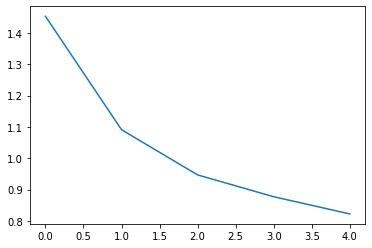

In [29]:
historial=model_cnn.fit(X_train, y_train, validation_batch_size=(X_test,y_test),epochs=5,batch_size=1024)
plt.plot(historial.history["loss"])

In [30]:
print(dicc_labels)
pred = model_cnn.predict(X_test)
print(classification_report(
    np.argmax(y_test,axis=1),
    np.argmax(pred, axis=1)
))

{0: 'forest', 1: 'street', 2: 'buildings', 3: 'mountain', 4: 'sea', 5: 'glacier'}
94/94 [==============================] - 23s 243ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       474
           1       0.77      0.70      0.74       501
           2       0.69      0.66      0.67       437
           3       0.65      0.74      0.70       525
           4       0.74      0.55      0.64       510
           5       0.66      0.80      0.72       553

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000



In [31]:
model_cnn.evaluate(X_test,y_test)

94/94 [==============================] - 21s 225ms/step - loss: 0.7656 - accuracy: 0.7230 - precision: 0.8007


[0.7656468749046326, 0.7229999899864197, 0.8007039427757263]

In [32]:
for i in range(0,15):
  pos= random.randint(0, 2999)
  #print(np.argmax(pred[pos]))
  print("y_pred-> %s vs real-> %s"%(dicc_labels[ np.argmax(pred[pos])] ,dicc_labels[np.argmax(y_test[pos])] ))
 

y_pred-> forest vs real-> forest
y_pred-> street vs real-> street
y_pred-> mountain vs real-> glacier
y_pred-> glacier vs real-> sea
y_pred-> forest vs real-> forest
y_pred-> glacier vs real-> glacier
y_pred-> glacier vs real-> glacier
y_pred-> glacier vs real-> glacier
y_pred-> forest vs real-> forest
y_pred-> glacier vs real-> glacier
y_pred-> mountain vs real-> sea
y_pred-> forest vs real-> forest
y_pred-> forest vs real-> forest
y_pred-> sea vs real-> sea
y_pred-> glacier vs real-> glacier


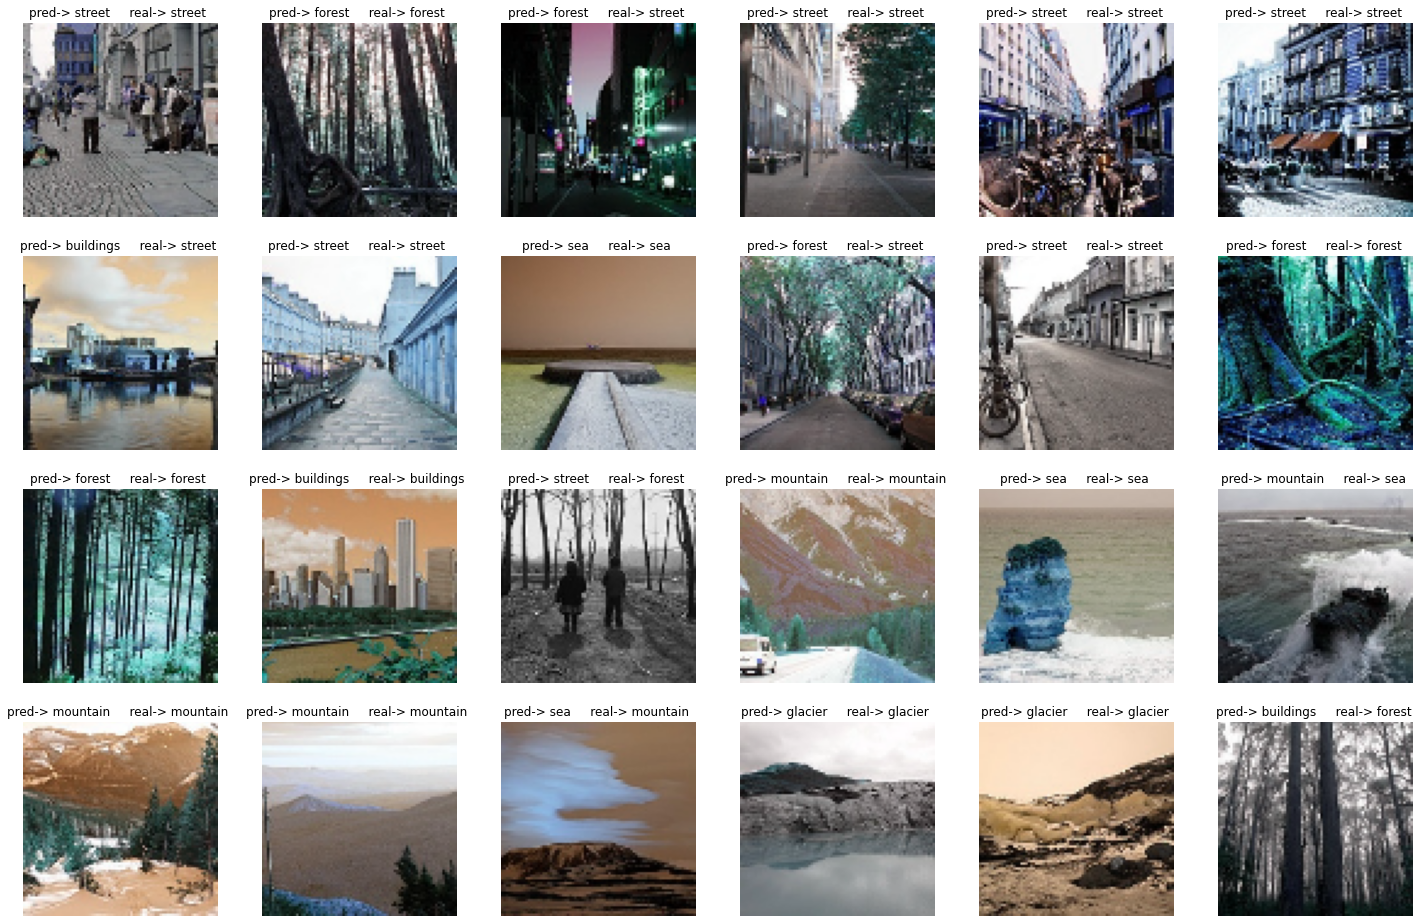

In [33]:
_images =_images.reshape(len(_images),s,s,3)
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0, 2999)
    plt.subplot(6,6,i+1)
    plt.imshow(_images[n[0]+pos])    
    plt.axis('off')
    plt.title("pred-> %s     real-> %s "%(dicc_labels[np.argmax(pred[pos])],dicc_labels[np.argmax(y_test[pos])]))